In [1]:
import numpy as np
import pandas as pd
from keras.models import load_model
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from skimage import transform, io, img_as_float, exposure
from skimage import morphology, io, color, exposure, img_as_float, transform
%matplotlib inline
np.set_printoptions(threshold = np.inf)

Using TensorFlow backend.


In [2]:
pwd

'/home/rw2449/introml/unit10_cnn'

/home/rw2449/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


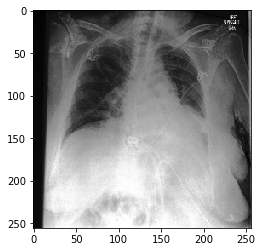

In [3]:
X=[]
path='./test1/Pneumonia/10.jpg'
im_shape = (256, 256)
img = img_as_float(io.imread(path))
# print(img)
img = transform.resize(img,im_shape)
plt.imshow(img,cmap = 'gray')
img = exposure.equalize_hist(img)
img = np.expand_dims(img, -1)
X.append(img)

/home/rw2449/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


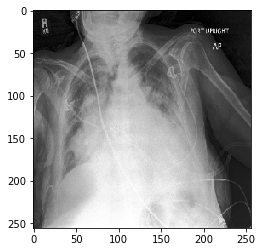

In [4]:
path='./dataset/Pneumonia/test_pne_15.jpg'
im_shape = (256, 256)
img = img_as_float(io.imread(path)) + 10
img = transform.resize(img, im_shape)
plt.imshow(img,cmap = 'gray')
img = exposure.equalize_hist(img)
img = np.expand_dims(img, -1)
X.append(img)

/home/rw2449/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


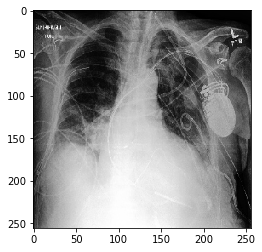

In [5]:
path='./dataset/non_Pneumonia/train_non_30028.jpg'
im_shape = (256, 256)
img = img_as_float(io.imread(path))
img = transform.resize(img, im_shape)
plt.imshow(img,cmap = 'gray')
img = exposure.equalize_hist(img)
img = np.expand_dims(img, -1)
X.append(img)

/home/rw2449/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


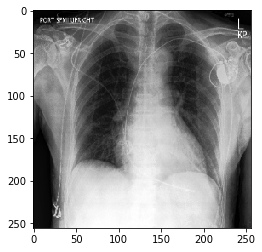

In [6]:
path='./dataset/non_Pneumonia/test_non_116.jpg'
im_shape = (256, 256)
img = img_as_float(io.imread(path))
img = transform.resize(img, im_shape)
plt.imshow(img,cmap = 'gray')
img = exposure.equalize_hist(img)
img = np.expand_dims(img, -1)
X.append(img)

In [7]:
X = np.array(X)
X -= X.mean()
X /= X.std()
X.shape
inp_shape = X[0].shape
print(X.shape)

(4, 256, 256, 1)


In [8]:
import keras.backend as K
from keras.models import load_model
K.clear_session()
model_name = './trained_model.hdf5'
UNet = load_model(model_name)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
def remove_small_regions(img, size):
    """Morphologically removes small (less than size) connected regions of 0s or 1s."""
    img = morphology.remove_small_objects(img, size)
    img = morphology.remove_small_holes(img, size)
    return img

In [10]:
def rect(pr):
    rectangle=np.zeros((256,256))
#     print(pr.shape)
#     print(pr)
    x=np.where(pr==True)[0]
    y=np.where(pr==True)[1]
    x1=x[np.argmin(x)]
    x2=x[np.argmax(x)]
    y1=y[np.argmin(y)]
    y2=y[np.argmax(y)]
#     print(x1,x2,y1,y2)
    for i in range(255):
        for j in range(255):
            if ((i>x1)&(i<x2)&(j>y1)&(j<y2)):
                rectangle[i,j]=1
    return rectangle

In [11]:
def prue(pic):
    x=np.where(pic==True)[0]
    y=np.where(pic==True)[1]
    x1=x[np.argmin(x)]
    x2=x[np.argmax(x)]
    y1=y[np.argmin(y)]
    y2=y[np.argmax(y)]
    print(x,y,x1,x2,y1,y2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/rw2449/anaconda3/lib/python3.5/site-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


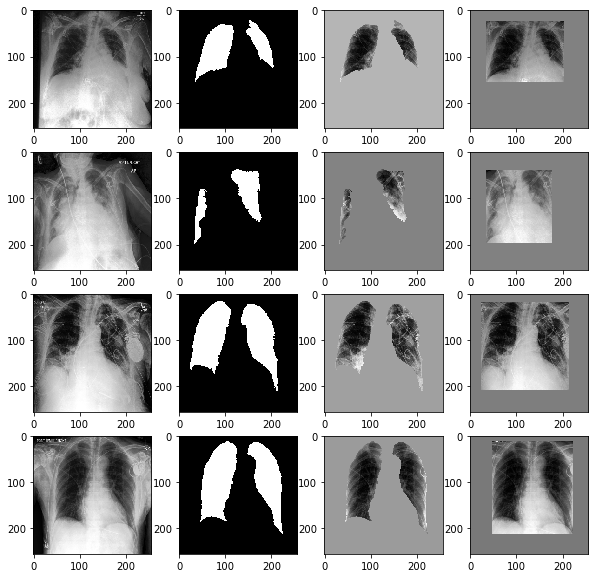

In [12]:
np.set_printoptions(threshold = np.inf)
i=0
plt.figure(figsize=(10, 10))
for xx in X:
    print(type(xx))
    
    xx1=xx[None,:,:,:]
    pred = UNet.predict(xx1)[..., 0].reshape(inp_shape[:2])
    pr = pred > 0.8
    pr = remove_small_regions(pr, 0.02 * np.prod(im_shape))
    if i < 4:
        plt.subplot(4, 4, 4 * i + 1)
        plt.imshow(xx.reshape(256,256),cmap = 'gray')
        plt.subplot(4, 4, 4 * i + 2)
        plt.imshow(pr,cmap = 'gray')
        plt.subplot(4, 4, 4 * i + 3)
        plt.imshow(xx.reshape(256,256)*pr,cmap = 'gray')
        plt.subplot(4, 4, 4 * i + 4)
        plt.imshow(rect(pr)*xx.reshape(256,256),cmap = 'gray')
    i += 1
    if i == 4:
        
        break